In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer

In [7]:
df = pd.read_csv("./datasets/Coleta_Brancas-body_petition.csv")

In [8]:
df = df.dropna(subset=["Original_Text", "Cor", "Conclusao"])

In [9]:
df = df.drop(columns=["Name", "Cor"], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 3 to 85
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Original_Text  20 non-null     object
 1   Conclusao      20 non-null     object
dtypes: object(2)
memory usage: 480.0+ bytes


In [11]:
labels = df["Conclusao"].value_counts().reset_index()

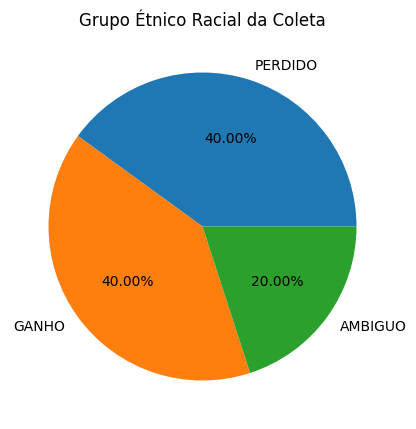

In [12]:
fig, ax = plt.subplots(figsize=(12,5))
ax.pie(labels["count"], labels=labels["Conclusao"], autopct="%.2f%%")
ax.set_title("Grupo Étnico Racial da Coleta")
plt.show()

In [13]:
nltk.download('stopwords')
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
def textPreprocessor(featureRecord):
    #Remove punctuations
    removePunctuation = [char for char in featureRecord if char not in string.punctuation]
    sentences =''.join(removePunctuation)

    #convert sentences to words
    words = sentences.split(" ")

    #normalize
    wordNormalized=[word.lower() for word in words]

    #remove stropwords
    finalWords=[word for word in wordNormalized if word not in stopwords.words("portuguese")]

    finalWords = [stemmer.stem(word) for word in finalWords]

    #joined = ' '.join(finalWords)

    return finalWords

In [15]:
!pip3 install spacy
!pip3 install unidecode


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
!python3 -m spacy download pt_core_news_sm;

C:\Users\alexa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe: No module named spacy


In [17]:
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from unidecode import unidecode

# Download Portuguese stopwords
stop_words = set(stopwords.words('portuguese'))

# Load the spaCy model for Portuguese
nlp = spacy.load("pt_core_news_sm")

def preprocess_text(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Retrieve the base form (lemma) of each word and remove punctuation
    lemmatized_words = [token.lemma_ for token in doc if token.text not in string.punctuation]

    # Remove stopwords and newline characters after lemmatization
    filtered_words = [word for word in lemmatized_words if word.lower() not in stop_words and word != '\n']

    # Remove accents from words
    cleaned_words = [unidecode(word) for word in filtered_words]

    # Reconstruct the text without stopwords, punctuation, accents, and newline characters
    preprocessed_text = ' '.join(cleaned_words)

    return preprocessed_text

# Example usage
text = "Estou correndo e pulando, mas com stopwords e \n que precisamos remover."
processed_text = preprocess_text(text)
print(processed_text)

correndo pular stopwords 
  precisar remover


In [18]:
df_sample = df.sample(frac=0.1, random_state=42)

In [19]:
df["Original_Text"] = df["Original_Text"].apply(preprocess_text)

In [20]:
df

,Original_Text,Conclusao
3,EXCELENTISSIMO SENHOR DOUTOR JUIZ DIREITO de...,PERDIDO
6,EXMO SR DR JUIZ DIREITO de o VARA CIVEL de o...,PERDIDO
11,fls 2 Papaleo Vieira Fagundes Furtado Advoga...,PERDIDO
23,EXCELENTISSIMA SENHORA JUIZA de o 2a VARA CIVE...,PERDIDO
24,EXCELENTISSIMO SENHOR DOUTOR JUIZ FEDERAL de o...,PERDIDO
27,JUIZO VARAS FEDERAIS de o SUBSECAO JUDICIARI...,AMBIGUO
31,-.~ -vz.-3 ~`:I PODER JUDICIARIO de o UNIAO ...,GANHO
36,EXCELENTISSIMO SENHOR DOUTOR JUIZ DIREITO de o...,AMBIGUO
38,EXCELENTISSIMO SENHOR DOUTOR JUIZ DIREITO de...,GANHO
47,MM Juiz Compulsando auto verificar se autor ...,AMBIGUO


In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'Cor' column
df['Conclusao'] = label_encoder.fit_transform(df['Conclusao'])

# TF - IDF

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer with stop words in Portuguese and using L2 normalization
Tfidf = TfidfVectorizer(norm='l2')

# Transform the text data in the "remainder__Original_Text" column of your DataFrame
X = Tfidf.fit_transform(df["Original_Text"]).toarray()


# Modelo

In [23]:
y = df["Conclusao"].dropna().reset_index()

In [24]:
X

array([[0.09735807, 0.06195514, 0.01362011, ..., 0.        , 0.        ,
        0.        ],
       [0.07454799, 0.09318498, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.17012959, 0.09721691, 0.14025371, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.11011892, 0.0629251 , 0.03631252, ..., 0.        , 0.        ,
        0.        ],
       [0.17718557, 0.15592331, 0.02453986, ..., 0.        , 0.        ,
        0.        ],
       [0.12338872, 0.05398256, 0.10680688, ..., 0.        , 0.        ,
        0.        ]])

In [25]:
y = y.drop(columns=["index"])

In [26]:
df

,Original_Text,Conclusao
3,EXCELENTISSIMO SENHOR DOUTOR JUIZ DIREITO de...,2
6,EXMO SR DR JUIZ DIREITO de o VARA CIVEL de o...,2
11,fls 2 Papaleo Vieira Fagundes Furtado Advoga...,2
23,EXCELENTISSIMA SENHORA JUIZA de o 2a VARA CIVE...,2
24,EXCELENTISSIMO SENHOR DOUTOR JUIZ FEDERAL de o...,2
27,JUIZO VARAS FEDERAIS de o SUBSECAO JUDICIARI...,0
31,-.~ -vz.-3 ~`:I PODER JUDICIARIO de o UNIAO ...,1
36,EXCELENTISSIMO SENHOR DOUTOR JUIZ DIREITO de o...,0
38,EXCELENTISSIMO SENHOR DOUTOR JUIZ DIREITO de...,1
47,MM Juiz Compulsando auto verificar se autor ...,0


In [27]:
df_sample = pd.read_csv("./datasets/Coleta_Negras.csv")

# PCA

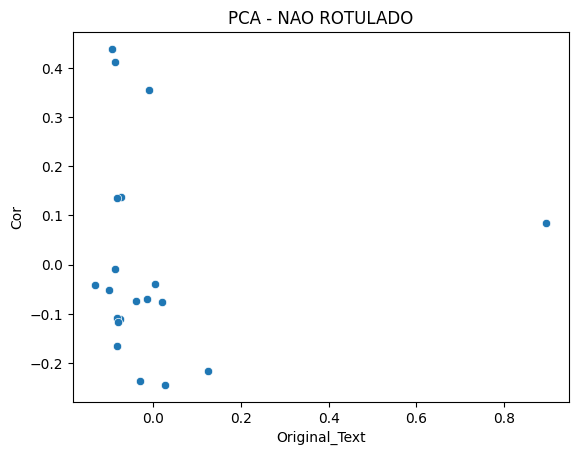

In [28]:
from sklearn.decomposition import PCA
import pandas as pd




pca = PCA(n_components=3)

X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['Original_Text',"Cor", "Conclusao"])
df_pca = df_pca.dropna(subset=["Conclusao"]).reset_index()



# Visualize the transformed data
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Original_Text', y='Cor', data=df_pca)
plt.title('PCA - NAO ROTULADO')
plt.show()

In [29]:
df_pca["Conclusao"]

0    -0.117045
1    -0.110954
2     0.050853
3     0.039572
4    -0.081276
5     0.240545
6    -0.056485
7     0.559954
8    -0.181681
9     0.381169
10   -0.109470
11   -0.065969
12   -0.152830
13    0.015771
14   -0.063258
15   -0.147901
16    0.060665
17   -0.087793
18   -0.136252
19   -0.037615
Name: Conclusao, dtype: float64

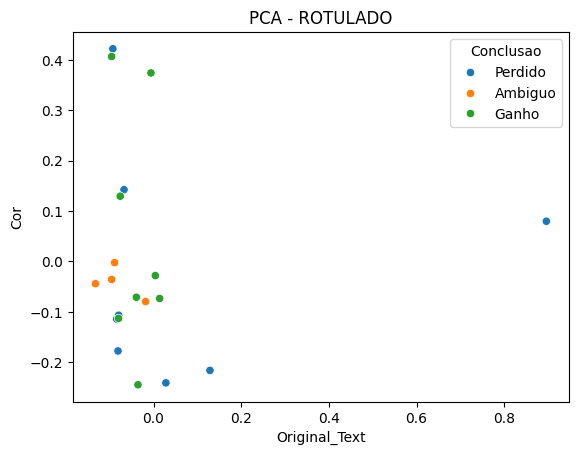

In [30]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd



# Instantiate the PCA model with the desired number of components
# In this example, we set n_components to 2 for 2D visualization
pca = PCA(n_components=3)

# Fit the PCA model and transform the data
X_pca = pca.fit_transform(X)

# Create a DataFrame for visualization purposes
df_pca = pd.DataFrame(data=X_pca, columns=['Original_Text', "Cor", "Conclusao"])
id_mapping = {0: 'Ambiguo', 1: 'Ganho', 2: "Perdido"}
df_pca['Conclusao'] = y["Conclusao"].map(id_mapping)



# Visualize the transformed data
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Original_Text', y='Cor', hue="Conclusao", data=df_pca)
plt.title('PCA - ROTULADO')
plt.show()


In [31]:
df_pca["Conclusao"]

0     Perdido
1     Perdido
2     Perdido
3     Perdido
4     Perdido
5     Ambiguo
6       Ganho
7     Ambiguo
8       Ganho
9     Ambiguo
10      Ganho
11    Ambiguo
12      Ganho
13      Ganho
14    Perdido
15    Perdido
16      Ganho
17      Ganho
18    Perdido
19      Ganho
Name: Conclusao, dtype: object

In [32]:
from datetime import datetime

# Get the current date and time
current_datetime = datetime.now()

# Format the date and time as a string
formatted_datetime = current_datetime.strftime("%Y-%m-%d %H:%M:%S")


In [33]:
from sklearn.model_selection import train_test_split
import numpy as np

y = np.ravel(y)

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

# Avaliação

In [34]:
#Creating a function to display model results
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluation_parametrics(name,y_test, y_pred):
    cm_test = confusion_matrix(y_test, y_pred )
    t1 = ConfusionMatrixDisplay(cm_test, display_labels=["Ambiguo", "Ganho","Perdido"])    
    print("Classification Report for Data Test")
    print(classification_report(y_test, y_pred))
    t1.plot()

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression  # Replace with your model

# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds

# Replace 'LogisticRegression()' with your specific model instantiation
model = LogisticRegression(random_state=42, max_iter=1000, solver="lbfgs", penalty="l2", C=1, tol=0.0001)

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())


Cross-Validation Results: [0.25 0.25 0.25 0.   0.25]
Mean F1 Score: 0.2


Classification Report for Data Test
              precision    recall  f1-score   support

           1       0.25      1.00      0.40         1
           2       0.00      0.00      0.00         3

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4



c:\Users\alexa\Desktop\OsCrias\crawler-api\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexa\Desktop\OsCrias\crawler-api\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexa\Desktop\OsCrias\crawler-api\venv\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (3).

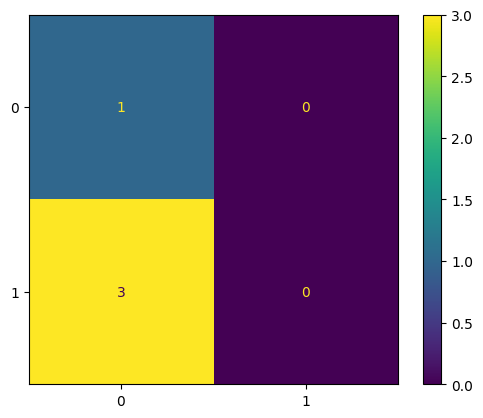

In [36]:
# Visualizing model results
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluation_parametrics("Machine Learning - Logistic", y_test, y_pred)

# SGD


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier  # Replace with your model

# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds

# Replace 'LogisticRegression()' with your specific model instantiation
model = SGDClassifier(random_state=42,alpha=0.0001, )

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())


Cross-Validation Results: [0.5        0.66666667 0.54166667 0.83333333 0.56521739]
Mean F1 Score: 0.6213768115942029


Classification Report for Data Test
              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.50      0.50      0.50        10
           2       0.50      0.71      0.59         7

    accuracy                           0.54        24
   macro avg       0.58      0.55      0.54        24
weighted avg       0.57      0.54      0.54        24



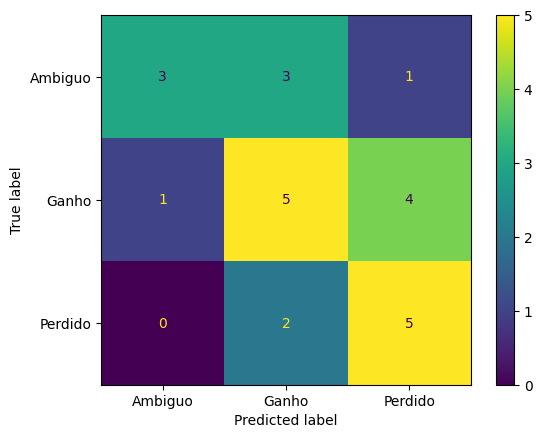

In [ ]:
# Visualizing model results
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluation_parametrics("Machine Learning - SGD", y_test, y_pred)

# KNN

In [ ]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds

# Replace 'LogisticRegression()' with your specific model instantiation
model = KNeighborsClassifier(n_neighbors=1, weights="uniform", algorithm="brute", leaf_size=30, p=2 )  # You can adjust the number of neighbors

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())


Cross-Validation Results: [0.41666667 0.54166667 0.45833333 0.70833333 0.56521739]
Mean F1 Score: 0.5380434782608695


Classification Report for Data Test
              precision    recall  f1-score   support

           0       0.36      0.57      0.44         7
           1       0.57      0.40      0.47        10
           2       0.33      0.29      0.31         7

    accuracy                           0.42        24
   macro avg       0.42      0.42      0.41        24
weighted avg       0.44      0.42      0.42        24



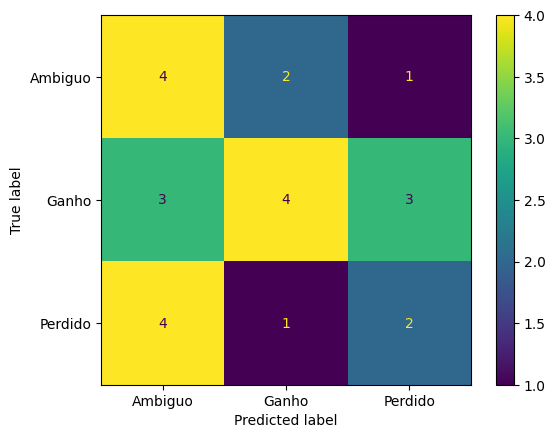

In [ ]:
# Visualizing model results
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluation_parametrics("Machine Learning - KNN", y_test, y_pred)

# SVM (SUPORT VECTOR MACHINE)

In [ ]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds

# Replace 'LogisticRegression()' with your specific model instantiation
model = LinearSVC(penalty="l2", loss='squared_hinge', tol=0.000001, C=10, multi_class='ovr', dual=True)

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())


Cross-Validation Results: [0.54166667 0.58333333 0.54166667 0.83333333 0.56521739]
Mean F1 Score: 0.6130434782608696


Classification Report for Data Test
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.60      0.30      0.40        10
           2       0.46      0.86      0.60         7

    accuracy                           0.54        24
   macro avg       0.58      0.58      0.54        24
weighted avg       0.58      0.54      0.52        24



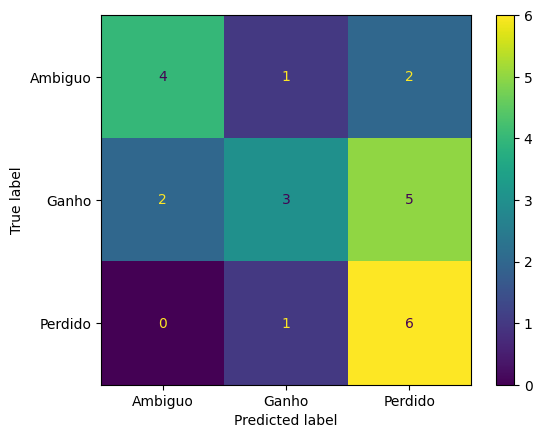

In [ ]:
# Visualizing model results
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluation_parametrics("Machine Learning - SVM", y_test, y_pred)

# RANDOM FOREST

In [ ]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds

# Replace 'LogisticRegression()' with your specific model instantiation
model = RandomForestClassifier(n_estimators=100, criterion='log_loss', max_depth=None, random_state=42)

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())

Cross-Validation Results: [0.58333333 0.79166667 0.58333333 0.83333333 0.73913043]
Mean F1 Score: 0.7061594202898551


Classification Report for Data Test
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       1.00      0.30      0.46        10
           2       0.44      1.00      0.61         7

    accuracy                           0.62        24
   macro avg       0.81      0.67      0.63        24
weighted avg       0.84      0.62      0.61        24



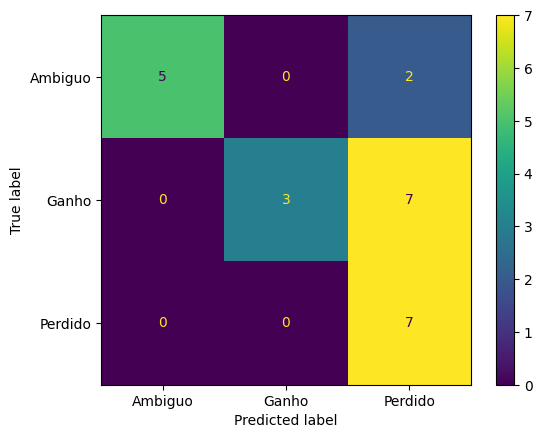

In [ ]:
# Visualizing model results
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluation_parametrics("Machine Learning - Random Forest", y_test, y_pred)

Cross-Validation Results: [0.58333333 0.58333333 0.54166667 0.875      0.65217391]
Mean F1 Score: 0.6471014492753623


<Figure size 2000x1000 with 0 Axes>

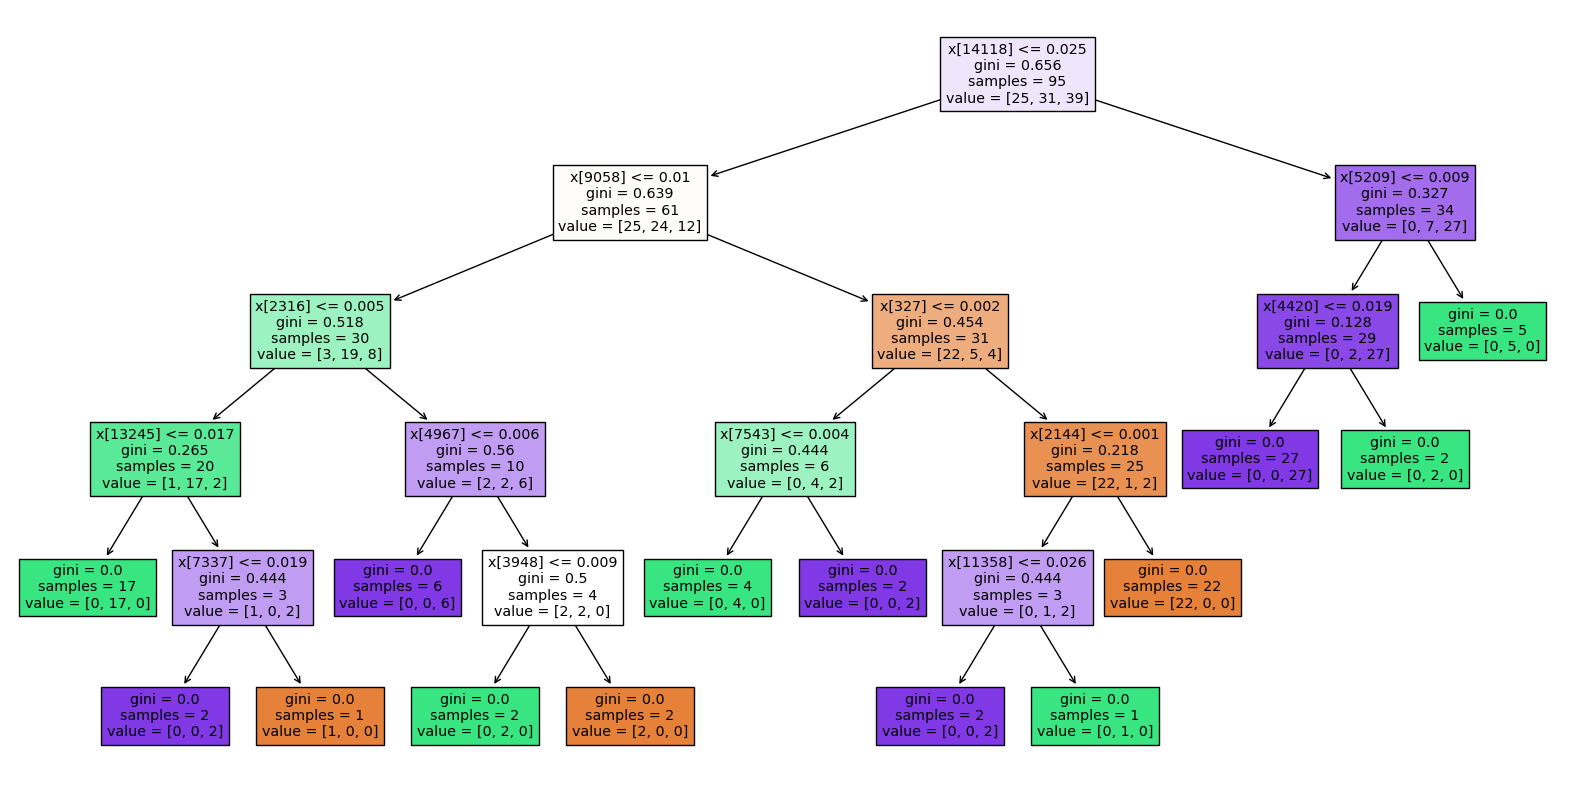

In [ ]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
# Assuming 'X' is your feature matrix and 'y' is your target variable
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)  # K is the number of folds


model = DecisionTreeClassifier(random_state=42)

# Use cross_val_score to perform K-Fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='f1_micro')  # Replace 'f1_micro' with your desired metric


# Print the cross-validation results
print("Cross-Validation Results:", cross_val_results)
print("Mean F1 Score:", cross_val_results.mean())

# Criar o classificador de árvore de decisão
clf = DecisionTreeClassifier()

# Treinar o classificador
clf.fit(X_train, y_train)

# Plotar a árvore de decisão
plt.figure(figsize=(20, 10))  # Ajustar o tamanho da figura conforme necessário
# Plotar a árvore de decisão
plt.figure(figsize=(20, 10))  # Ajustar o tamanho da figura conforme necessário
plot_tree(clf, filled=True)


plt.show()

Classification Report for Data Test
              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.54      0.70      0.61        10
           2       0.56      0.71      0.62         7

    accuracy                           0.58        24
   macro avg       0.70      0.57      0.56        24
weighted avg       0.68      0.58      0.57        24



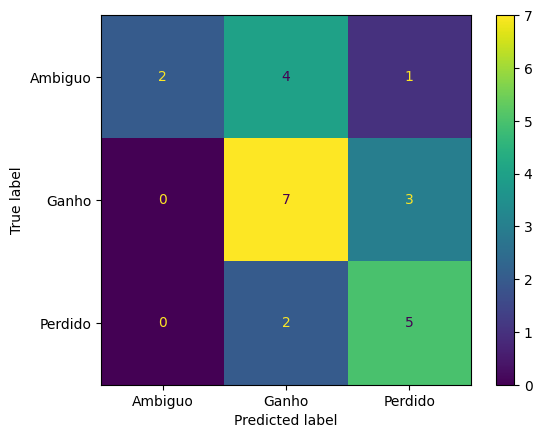

In [ ]:
# Visualizing model results
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluation_parametrics("Machine Learning - Decision Tree", y_test, y_pred)